In [274]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [275]:
all_divisions = {
    "Premier Main": 424,
    "2": 425,
    "3": 426,
    "4": 427,
    "5": 428,
    "6": 429,
    "7A": 430,
    "7B": 431,
    "8A": 432,
    "8B": 433,
    "9": 434,
    "10": 435,
    "11": 436,
    "12": 437,
    "13A": 438,
    "13B": 439,
    "14": 440,
    "15A": 441,
    "15B": 442,
    "Premier Masters": 443,
    "M2": 444,
    "M3": 445,
    "M4": 446,
    "Premier Ladies": 447,
    "L2": 448,
    "L3": 449,
    "L4": 450,
    }

In [276]:
base_directory = r"C:\Users\bpali\PycharmProjects\SquashApp\previous_seasons"

### Load Summary data

In [277]:
# Load all seasons summary data
summary_df_list = []
for season_folder in os.listdir(base_directory):
    season_folder_path = os.path.join(base_directory, season_folder)
    ranking_df_folder = os.path.join(season_folder_path, "summary_df")
    for file in os.listdir(ranking_df_folder):
        if not file.endswith("summary_df.csv"):
            continue
        file_path = os.path.join(ranking_df_folder, file)
        df = pd.read_csv(file_path)
        # Add Division column to the dataframe
        df["Division"] = file.split("_")[0]
        # Add Season column to the dataframe
        df["Season"] = season_folder
        # Add Rank column to the dataframe
        df["Rank"] = df.index + 1
        summary_df_list.append(df)

# Concatenate all the dataframes in df_list into one big dataframe
all_previous_summary_df = pd.concat(summary_df_list, ignore_index=True)

In [278]:
# Load summary_dfs for 2024-2025 season

summary_directory = r"C:\Users\bpali\PycharmProjects\SquashApp\2024-2025\summary_df"

summary_dfs = []
for division in all_divisions.keys():
    for week in range(10, 0, -1):
        try:
            summary_df = pd.read_csv(f"{summary_directory}\\week_{week}\\{division}_summary_df.csv")
            summary_df["Division"] = division
            # Create Rank column based on Points column
            summary_df["Rank"] = summary_df.index + 1
            # Add Season column to the dataframe
            summary_df["Season"] = "2024-2025"
            summary_dfs.append(summary_df)
            break
        except FileNotFoundError:
            continue

# Concatenate all the summary dataframes into one
summary_df_2024_2025 = pd.concat(summary_dfs)

In [279]:
# Concatenate the summary dataframes from all seasons
big_summary_df = pd.concat([all_previous_summary_df, summary_df_2024_2025], ignore_index=True)

# Drop rows where Played is equal to zero
big_summary_df = big_summary_df[big_summary_df["Played"] != 0]

### Load Ranking data

In [280]:
# 2024-2025 ranking_df directory
ranking_df_dir = r"C:\Users\bpali\PycharmProjects\SquashApp\2024-2025\ranking_df"

In [281]:
# In the the summary directory are week_x folders (eg week_4). First check the most recent folder (ie the highest number), then check the next highest, etc, 
# using the all_divisions dictionary to make sure we load every division's most recent summary file and avoid loading an older file for a division that has a more recent file.

ranking_dfs = []
for division in all_divisions.keys():
    for week in range(10, 0, -1):
        try:
            ranking_df = pd.read_csv(f"{ranking_df_dir}\\week_{week}\\{division}_ranking_df.csv")
            ranking_df["Season"] = "2024-2025"
            ranking_dfs.append(ranking_df)
            break
        except FileNotFoundError:
            continue

# Concatenate all the summary dataframes into one
ranking_df_2024_2025 = pd.concat(ranking_dfs)

In [282]:
# In the base directory are seasons folders (eg. 2019-2020, 2020-2021, etc.). We want to go through each season folder, go into the ranking_df folder for that season, 
# and read in all the ranking_df files (determined by whether the file ends in ranking_df) into a list of dataframes. We will then concatenate all the dataframes into one big dataframe.
# Add a Season column to the dataframe to keep track of which season the data is from.

ranking_df_list = []
for season_folder in os.listdir(base_directory):
    season_folder_path = os.path.join(base_directory, season_folder)
    ranking_df_folder = os.path.join(season_folder_path, "ranking_df")
    for file in os.listdir(ranking_df_folder):
        if not file.endswith("ranking_df.csv"):
            continue
        file_path = os.path.join(ranking_df_folder, file)
        df = pd.read_csv(file_path)
        df["Season"] = season_folder
        ranking_df_list.append(df)

# Concatenate all the dataframes in df_list into one big dataframe
big_ranking_df = pd.concat(ranking_df_list)


In [283]:
# Concatenate the 2024-2025 ranking_df with the big_ranking_df
final_ranking_df = pd.concat([big_ranking_df, ranking_df_2024_2025])

### Load Schedules data

In [284]:
# Load all seasons summary data
schedules_df_list = []
for season_folder in os.listdir(base_directory):
    season_folder_path = os.path.join(base_directory, season_folder)
    ranking_df_folder = os.path.join(season_folder_path, "schedules_df")
    for file in os.listdir(ranking_df_folder):
        if not file.endswith("schedules_df.csv"):
            continue
        file_path = os.path.join(ranking_df_folder, file)
        df = pd.read_csv(file_path)
        # Add Division column to the dataframe
        df["Division"] = file.split("_")[0]
        # Add Season column to the dataframe
        df["Season"] = season_folder

        schedules_df_list.append(df)

# Concatenate all the dataframes in df_list into one big dataframe
all_previous_schedules_df = pd.concat(schedules_df_list, ignore_index=True)

In [285]:
# 2024-2025 schedules_df directory
schedules_df_dir = r"C:\Users\bpali\PycharmProjects\SquashApp\2024-2025\schedules_df"

In [286]:
schedules_dfs = []
for division in all_divisions.keys():
    for week in range(10, 0, -1):
        try:
            schedules_df = pd.read_csv(f"{schedules_df_dir}\\week_{week}\\{division}_schedules_df.csv")
            schedules_df["Season"] = "2024-2025"
            schedules_df["Division"] = division
            schedules_dfs.append(schedules_df)
            break
        except FileNotFoundError:
            continue

In [287]:
# Concatenate all the summary dataframes into one
schedules_df_2024_2025 = pd.concat(schedules_dfs)

In [288]:
# Concatenate the schedules dataframes from all seasons
all_schedules_df = pd.concat([all_previous_schedules_df, schedules_df_2024_2025], ignore_index=True)

In [289]:
# Tidy Venue column
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Cornwall Street (CSPSC)", "Cornwall Street Squash Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Masters - Cornwall Street (CSPSC - M)", "Cornwall Street Squash Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Masters - Cornwall Street (M - CSPSC)", "Cornwall Street Squash Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("HK Squash Centre (HKSC)", "HK Squash Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Masters - HK Squash Centre", "HK Squash Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("HK Squash Centre (M - HKSC)", "HK Squash Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Hong Kong Football Club (HKFC)", "Hong Kong Football Club")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Hong Kong Cricket Club (HKCC)", "Hong Kong Cricket Club")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Kowloon Cricket Club (KCC)", "Kowloon Cricket Club")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("United Services Recreation Club (USRC)", "United Services Recreation Club")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Pei Ho Street (PHSSC)", "Pei Ho Street Sports Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Java Road (JRSC)", "Java Road")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Masters - Java Road (JRSC - M)", "Java Road")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Harbour Road (HRSC)", "Harbour Road Sports Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Masters - Harbour Road Sports Centre", "Harbour Road Sports Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Ladies Recreation Club (LRC)", "Ladies Recreation Club")

In [290]:
all_schedules_df["Venue"].value_counts().head(20)

Venue
Cornwall Street Squash Centre             5178
HK Squash Centre                          3349
Hong Kong Football Club                   2340
Hong Kong Cricket Club                    1214
Kowloon Cricket Club                       894
Kwun Chung (KCSC)                          513
United Services Recreation Club            440
Pei Ho Street Sports Centre                430
Harbour Road Sports Centre                 246
Ladies Recreation Club                     246
Java Road                                  166
HK CLUB                                    120
Yuen Long Jockey Club (YLJCSC)             118
Royal Hong Kong Yacht Club (RHKYC)         110
Chinese University of HK (CUHK)            108
Police Sports & Recreation Club (PSRC)      89
Hong Kong Sports Institute (HKSI)           81
Yuen Long Jockey Club Squash Courts         79
HKJC Sha Tin Club House (HKJC)              77
Wai Tsuen (WTSC)                            68
Name: count, dtype: int64

In [291]:
def parse_result(result):
    """
    Function to parse the 'result' string
    """
    overall, rubbers = result.split('(')
    rubbers = rubbers.strip(')').split(',')
    return overall, rubbers

In [292]:
# Drop unnecessary columns
all_schedules_df.drop(columns=['vs', 'Time'], inplace=True)

# Exclude rows where 'Away Team' is '[BYE]' (indicative of a bye week)
results_df = all_schedules_df[all_schedules_df['Away Team'] != '[BYE]'].copy()

# Replace NaN values in 'Result' with an empty string before applying str.contains
results_df['Result'] = results_df['Result'].fillna('')

# Keep rows where 'Result' contains brackets (indicative of a played match)
results_df = results_df[results_df['Result'].str.contains(r'\(')]

# Apply the function to the 'Result' column
results_df[['Overall Score', 'Rubbers']] = results_df['Result'].apply(lambda x: pd.Series(parse_result(x)))

# Splitting the 'Overall Score' into two separate columns
results_df[['Home Score', 'Away Score']] = results_df['Overall Score'].str.split('-', expand=True).astype(int)

# Get counts for CR and WO
results_df['CR'] = results_df['Rubbers'].apply(lambda x: x.count('CR'))
results_df['WO'] = results_df['Rubbers'].apply(lambda x: x.count('WO'))

# Create combined CR and WO column
results_df['CR_WO'] = results_df['CR'] + results_df['WO']

In [293]:
# Filter out rows where Home Score and Away Score don't sum to 5
results_df_5 = results_df[results_df['Home Score'] + results_df['Away Score'] == 5]

In [294]:
# Include only rows where Venue equals 'Cornwall Street Squash Centre', 'HK Squash Centre', 'Hong Kong Football Club', 'Hong Kong Cricket Club', 'Kowloon Cricket Club', 'United Services Recreation Club'.

venues = ['Cornwall Street Squash Centre', 'HK Squash Centre', 'Hong Kong Football Club', 'Hong Kong Cricket Club', 'Kowloon Cricket Club', 'United Services Recreation Club']
results_df_5 = results_df_5[results_df_5['Venue'].isin(venues)]

In [295]:
# Get average Home Score by Venue
results_df_5.groupby('Venue')['Home Score'].mean().sort_values(ascending=False)

Venue
Kowloon Cricket Club               3.325581
Hong Kong Football Club            2.996904
United Services Recreation Club    2.903509
Hong Kong Cricket Club             2.840836
Cornwall Street Squash Centre      2.628858
HK Squash Centre                   2.410876
Name: Home Score, dtype: float64

In [296]:
# Get mean of Home Score by Season
results_df_5.groupby('Season')['Home Score'].mean()

Season
2016-2017    2.660000
2017-2018    2.713142
2018-2019    2.731082
2019-2020    2.701635
2021-2022    2.586160
2022-2023    2.760300
2023-2024    2.661187
2024-2025    2.646421
Name: Home Score, dtype: float64

In [297]:
# Count average instances of 'CR' and 'WO' in the 'Rubbers' column per match by Venue
results_df_5['CR'] = results_df_5['Rubbers'].apply(lambda x: x.count('CR'))
results_df_5['WO'] = results_df_5['Rubbers'].apply(lambda x: x.count('WO'))

results_df_5.groupby('Venue')[['CR', 'WO']].mean()

,CR,WO
Venue,,
Cornwall Street Squash Centre,0.262126,0.085007
HK Squash Centre,0.334916,0.130341
Hong Kong Cricket Club,0.197749,0.112540
Hong Kong Football Club,0.149381,0.048762
Kowloon Cricket Club,0.175313,0.044723
United Services Recreation Club,0.134503,0.055556


In [298]:
# Create 5 match rolling average for CR and WO by Match Week for results_df, 
results_df_5['CR Rolling Mean'] = results_df_5['CR'].transform(lambda x: x.rolling(5, 1).mean())
results_df_5['WO Rolling Mean'] = results_df_5['WO'].transform(lambda x: x.rolling(5, 1).mean())


In [299]:
results_df.head()

,Home Team,Away Team,Venue,Result,Match Week,Date,Division,Season,Overall Score,Rubbers,Home Score,Away Score,CR,WO,CR_WO
0,The Hong Kong Jockey Club,i-MASK Advance Squash Club 7,HKJC Sha Tin Club House (HKJC),"1-4(0-3,1-3,0-3,3-2,2-3)",1,03/10/2016,10,2016-2017,1-4,"[0-3, 1-3, 0-3, 3-2, 2-3]",1,4,0,0,0
1,Hong Kong Football Club 10A,Hong Kong Football Club 10B,Hong Kong Football Club,"3-2(1-3,3-0,3-1,1-3,3-0)",1,03/10/2016,10,2016-2017,3-2,"[1-3, 3-0, 3-1, 1-3, 3-0]",3,2,0,0,0
2,Royal Hong Kong Yacht Club 10,Banbil,Royal Hong Kong Yacht Club (RHKYC),"4-1(0-3,3-0,3-0,3-0,3-0)",1,03/10/2016,10,2016-2017,4-1,"[0-3, 3-0, 3-0, 3-0, 3-0]",4,1,0,0,0
3,Xavier,Perrier KCC 7,Cornwall Street Squash Centre,"3-2(3-2,3-0,3-2,0-3,2-3)",1,03/10/2016,10,2016-2017,3-2,"[3-2, 3-0, 3-2, 0-3, 2-3]",3,2,0,0,0
4,i-MASK Advance Squash Club 7,Royal Hong Kong Yacht Club 10,Cornwall Street Squash Centre,"3-2(3-0,3-0,3-1,1-3,2-3)",2,17/10/2016,10,2016-2017,3-2,"[3-0, 3-0, 3-1, 1-3, 2-3]",3,2,0,0,0


In [300]:
match_week_count = results_df.groupby('Match Week')['Home Score'].count().reset_index()

In [301]:
cr_wo_data = results_df.groupby('Match Week')[['CR', 'WO']].mean().reset_index()
print(cr_wo_data)

    Match Week        CR        WO
0            1  0.111247  0.046455
1            2  0.142005  0.053699
2            3  0.179762  0.051190
3            4  0.167464  0.071770
4            5  0.202454  0.053988
5            6  0.193431  0.063260
6            7  0.193026  0.090909
7            8  0.189333  0.077333
8            9  0.307479  0.109418
9           10  0.286713  0.099301
10          11  0.196455  0.079764
11          12  0.186325  0.088889
12          13  0.269017  0.103896
13          14  0.294896  0.090737
14          15  0.303605  0.119545
15          16  0.354528  0.098266
16          17  0.252896  0.150579
17          18  0.317215  0.187621
18          19  0.462338  0.158442
19          20  0.454545  0.163102
20          21  0.586319  0.195440
21          22  0.601695  0.152542


In [302]:
cr_wo_data = cr_wo_data.set_index('Match Week').reindex(range(1, cr_wo_data['Match Week'].max() + 1)).reset_index()
cr_wo_data

,Match Week,CR,WO
0,1,0.111247,0.046455
1,2,0.142005,0.053699
2,3,0.179762,0.051190
3,4,0.167464,0.071770
4,5,0.202454,0.053988
5,6,0.193431,0.063260
6,7,0.193026,0.090909
7,8,0.189333,0.077333
8,9,0.307479,0.109418
9,10,0.286713,0.099301


In [303]:
# Merge cr_wo_data with match_week_count
cr_wo_data = cr_wo_data.merge(match_week_count, on='Match Week', how='left')
cr_wo_data

,Match Week,CR,WO,Home Score
0,1,0.111247,0.046455,818
1,2,0.142005,0.053699,838
2,3,0.179762,0.051190,840
3,4,0.167464,0.071770,836
4,5,0.202454,0.053988,815
5,6,0.193431,0.063260,822
6,7,0.193026,0.090909,803
7,8,0.189333,0.077333,750
8,9,0.307479,0.109418,722
9,10,0.286713,0.099301,715


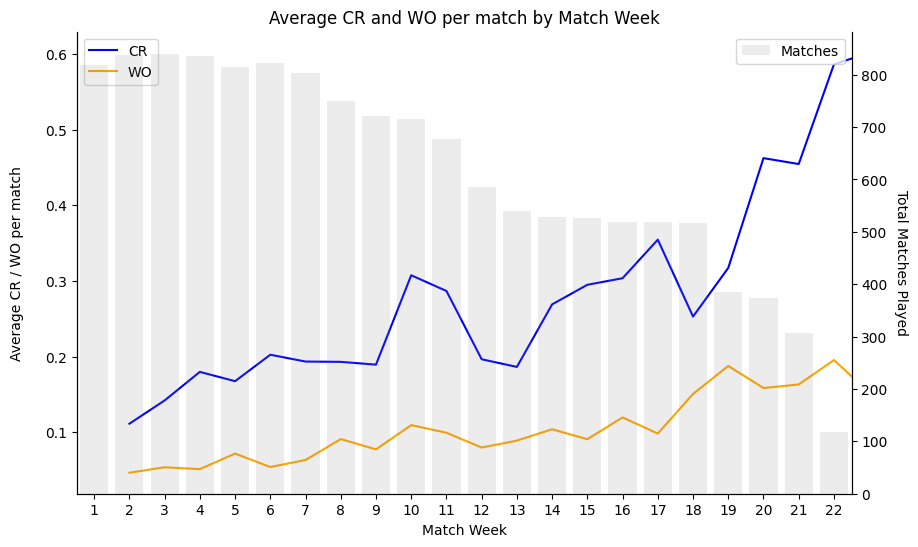

In [304]:
# Create graph to show average CR and WO per match by Match Week without confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=cr_wo_data, x='Match Week', y='CR', label='CR', errorbar=None, color='blue')
sns.lineplot(data=cr_wo_data, x='Match Week', y='WO', label='WO', errorbar=None, color='orange')

# Add axis to show count of matches per Match Week
ax2 = ax.twinx()
sns.barplot(data=cr_wo_data, x="Match Week", y='Home Score', label='Matches', color='grey', ax=ax2, alpha=0.15)
sns.despine(right=False)

plt.title('Average CR and WO per match by Match Week')

# Set the title of the left y-axis
ax.set_ylabel("Average CR / WO per match", rotation=90, labelpad=15)
# Set the title of the right y-axis
ax2.set_ylabel("Total Matches Played", rotation=-90, labelpad=15)
plt.xlabel('Match Week')
plt.legend()
plt.show()

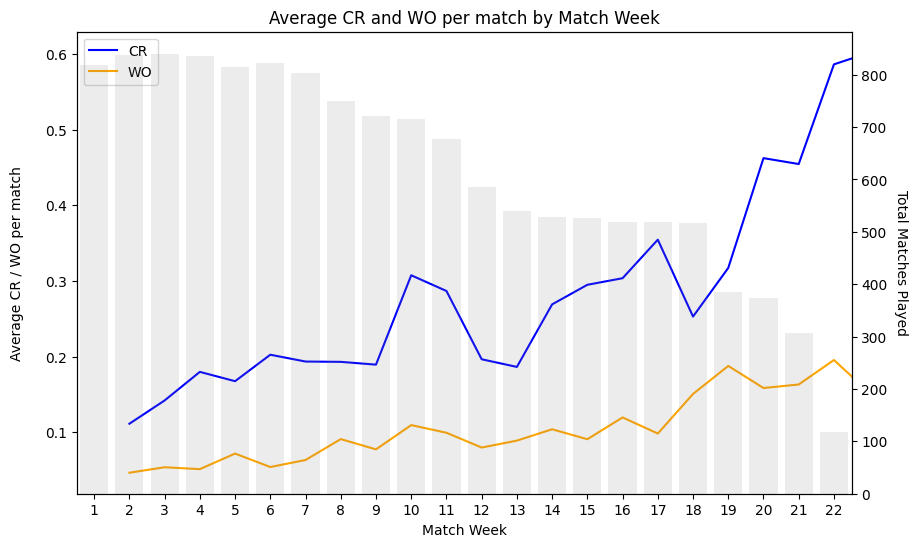

In [358]:
# Convert Match Week to categorical
cr_wo_data['Match Week'] = cr_wo_data['Match Week'].astype('category')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lineplots
sns.lineplot(data=cr_wo_data, x='Match Week', y='CR', label='CR', errorbar=None, color='blue', ax=ax)
sns.lineplot(data=cr_wo_data, x='Match Week', y='WO', label='WO', errorbar=None, color='orange', ax=ax)

# Add secondary axis with barplot
ax2 = ax.twinx()
sns.barplot(data=cr_wo_data, x='Match Week', y='Home Score', color='grey', ax=ax2, alpha=0.15, dodge=False)

# Adjust x-axis ticks and labels
ax.set_xticks(range(len(cr_wo_data['Match Week'])))
ax.set_xticklabels(cr_wo_data['Match Week'])

# Title and labels
plt.title('Average CR and WO per match by Match Week')
ax.set_ylabel("Average CR / WO per match", rotation=90, labelpad=15)
ax2.set_ylabel("Total Matches Played", rotation=-90, labelpad=15)
ax.set_xlabel("Match Week")

# Add legend for lineplots
ax.legend(loc='upper left')

plt.show()

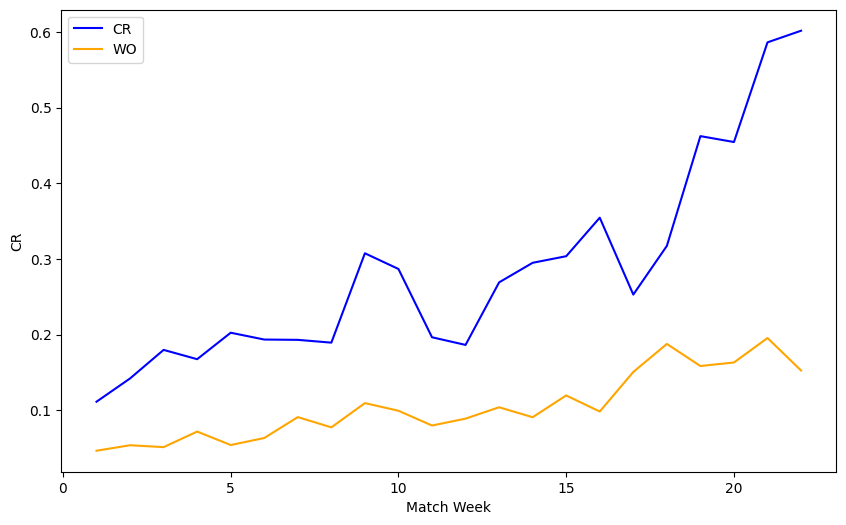

In [305]:
# Create graph to show average CR and WO per match by Match Week without confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=results_df, x='Match Week', y='CR', label='CR', errorbar=None, color='blue')
sns.lineplot(data=results_df, x='Match Week', y='WO', label='WO', errorbar=None, color='orange')
plt.xlabel('Match Week')
plt.legend()
plt.show()

In [306]:
results_df.groupby("Match Week")["CR"].mean()

Match Week
1     0.111247
2     0.142005
3     0.179762
4     0.167464
5     0.202454
6     0.193431
7     0.193026
8     0.189333
9     0.307479
10    0.286713
11    0.196455
12    0.186325
13    0.269017
14    0.294896
15    0.303605
16    0.354528
17    0.252896
18    0.317215
19    0.462338
20    0.454545
21    0.586319
22    0.601695
Name: CR, dtype: float64

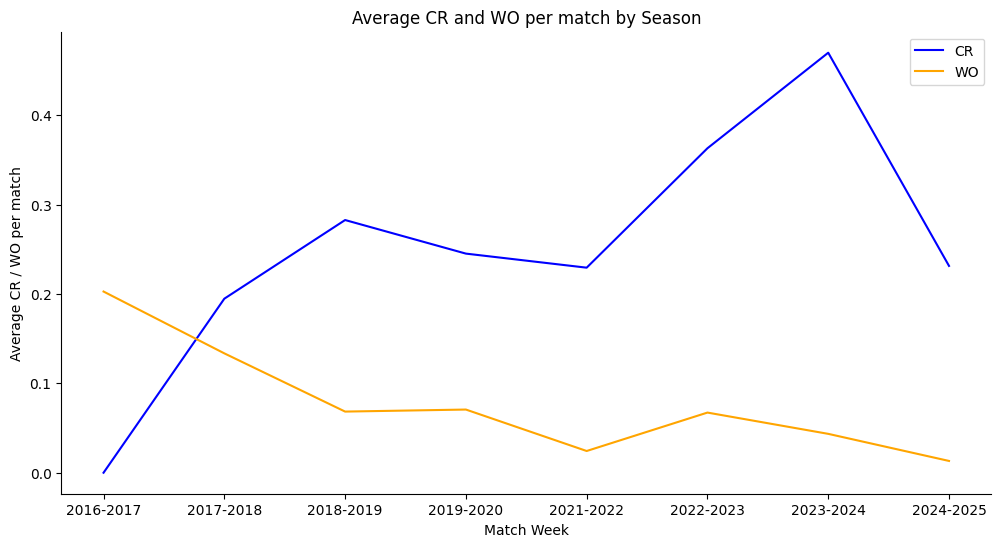

In [307]:
# Create graph to show average CR and WO per match by Season without confidence intervals
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='Season', y='CR', label='CR', errorbar=None, color='blue')
sns.lineplot(data=results_df, x='Season', y='WO', label='WO', errorbar=None, color='orange')
sns.despine()

plt.title('Average CR and WO per match by Season')
plt.ylabel('Average CR / WO per match')
plt.xlabel('Match Week')
plt.legend()
plt.show()

In [308]:
results_df_2016 = results_df[results_df['Season'] == '2016-2017']
results_df_2017 = results_df[results_df['Season'] == '2017-2018']
results_df_2018 = results_df[results_df['Season'] == '2018-2019']
results_df_2022 = results_df[results_df['Season'] == '2022-2023']
results_df_2023 = results_df[results_df['Season'] == '2023-2024']
results_df_2024 = results_df[results_df['Season'] == '2024-2025']

# Create 5 Match Week rolling average of CR_WO for each season
results_df_2016['CR_WO Rolling Mean'] = results_df_2016['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
results_df_2017['CR_WO Rolling Mean'] = results_df_2017['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
results_df_2018['CR_WO Rolling Mean'] = results_df_2018['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
results_df_2022['CR_WO Rolling Mean'] = results_df_2022['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
results_df_2023['CR_WO Rolling Mean'] = results_df_2023['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
results_df_2024['CR_WO Rolling Mean'] = results_df_2024['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())

C:\Users\bpali\AppData\Local\Temp\ipykernel_31116\2814105957.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_2016['CR_WO Rolling Mean'] = results_df_2016['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
C:\Users\bpali\AppData\Local\Temp\ipykernel_31116\2814105957.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_2017['CR_WO Rolling Mean'] = results_df_2017['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
C:\Users\bpali\AppData\Local\Temp\ipykernel_31116\2814105957.py:11:

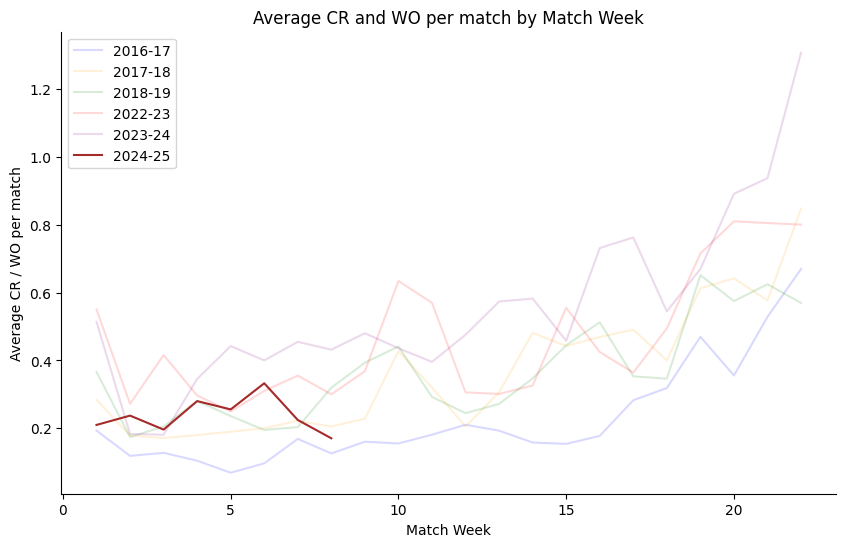

In [309]:
# Create graph to show average CR and WO per match by Match Week without confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=results_df_2016, x='Match Week', y='CR_WO Rolling Mean', label="2016-17", errorbar=None, color='blue', alpha=0.15)
sns.lineplot(data=results_df_2017, x='Match Week', y='CR_WO Rolling Mean', label="2017-18", errorbar=None, color='orange', alpha=0.15)
sns.lineplot(data=results_df_2018, x='Match Week', y='CR_WO Rolling Mean', label='2018-19', errorbar=None, color='green', alpha=0.15)
sns.lineplot(data=results_df_2022, x='Match Week', y='CR_WO Rolling Mean', label='2022-23', errorbar=None, color='red', alpha=0.15)
sns.lineplot(data=results_df_2023, x='Match Week', y='CR_WO Rolling Mean', label='2023-24', errorbar=None, color='purple', alpha=0.15)
sns.lineplot(data=results_df_2024, x='Match Week', y='CR_WO Rolling Mean', label='2024-25', errorbar=None, color='brown', alpha=1)
sns.despine()

plt.title('Average CR and WO per match by Match Week')
plt.ylabel('Average CR / WO per match')
plt.xlabel('Match Week')
plt.show()

In [310]:
# For results_df, group by 'Season', sum "CR_WO" and divide by the number of matches played in that season
results_df.groupby('Season')['CR_WO'].sum() / results_df.groupby('Season')['Match Week'].count()

Season
2016-2017    0.202656
2017-2018    0.328165
2018-2019    0.351015
2019-2020    0.315742
2021-2022    0.253644
2022-2023    0.430187
2023-2024    0.513256
2024-2025    0.244510
dtype: float64

In [311]:
results_df.groupby('Season')['CR_WO'].sum()

Season
2016-2017    473
2017-2018    762
2018-2019    847
2019-2020    353
2021-2022    261
2022-2023    761
2023-2024    968
2024-2025    167
Name: CR_WO, dtype: int64

In [312]:
# Count total number of matches per Season
results_df.groupby('Season')['Home Score'].count()

Season
2016-2017    2334
2017-2018    2322
2018-2019    2413
2019-2020    1118
2021-2022    1029
2022-2023    1769
2023-2024    1886
2024-2025     683
Name: Home Score, dtype: int64

### Total number of unique registered players by season

In [313]:
# Get total number of players in each season
total_players = final_ranking_df.groupby("Season")["Name of Player"].nunique()
total_players

Season
2016-2017    1890
2017-2018    1946
2018-2019    1900
2019-2020    1925
2021-2022    1592
2022-2023    1519
2023-2024    1657
2024-2025    1698
Name: Name of Player, dtype: int64

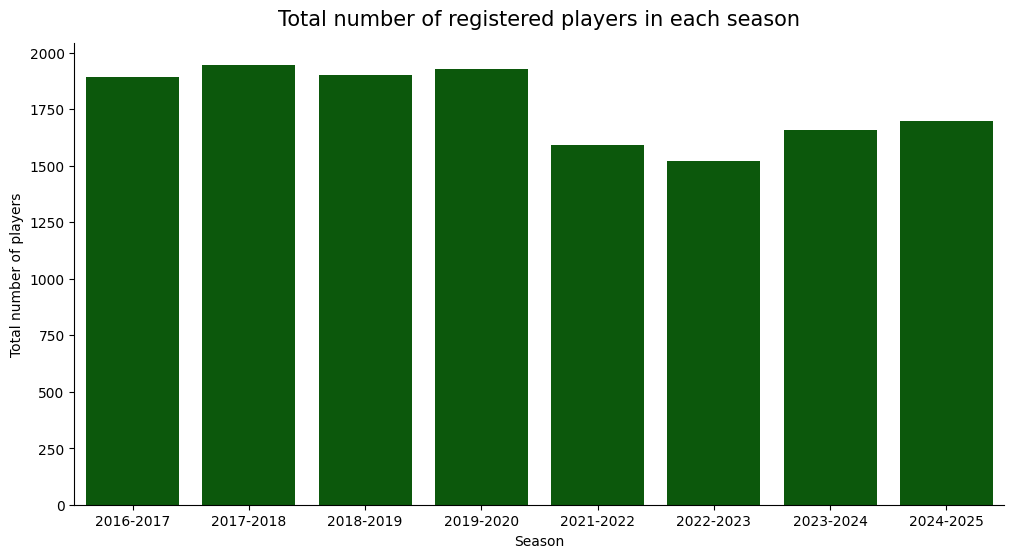

In [314]:
# Create plot to show total number of players in each season
plt.figure(figsize=(12, 6))
sns.barplot(x=total_players.index, y=total_players.values, color='darkgreen')
plt.title('Total number of registered players in each season', y=1.02, size=15)
plt.ylabel('Total number of players')
plt.xlabel('Season')
sns.despine()
plt.show()

### Total number of unique players in each season to have played 5+ games

In [315]:
# Get total number of players in each season who have played at least 5 matches
total_players_5 = final_ranking_df[final_ranking_df["Games Played"] >= 5].groupby("Season")["Name of Player"].nunique()
total_players_5

Season
2016-2017    1597
2017-2018    1593
2018-2019    1584
2019-2020    1080
2021-2022     980
2022-2023    1252
2023-2024    1336
2024-2025     471
Name: Name of Player, dtype: int64

### Show which divisions players played in over the seasons

In [316]:
# Filter big_df to only include players who have played 5+ games
final_ranking_df_filtered = final_ranking_df[final_ranking_df["Games Played"] >= 1]

In [317]:
# Drop rows where Division is NaN
final_ranking_df_filtered = final_ranking_df_filtered.dropna(subset=["Division"]).copy()
# Filter out rows where Division contains "M" or "L"
final_ranking_df_filtered = final_ranking_df_filtered[~final_ranking_df_filtered["Division"].str.contains("M|L", na=False)]
# Aggregate the data to ensure no duplicate entries
final_ranking_df_filtered_unique = final_ranking_df_filtered.groupby(["Name of Player", "Season"])["Division"].first().reset_index()
# Create a new dataframe where the seasons are the columns, the rows are the players, and the values are the division the player was in that season
player_divisions = final_ranking_df_filtered_unique.pivot(index="Name of Player", columns="Season", values="Division")

In [318]:
player_divisions

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025
Name of Player,,,,,,,,
* Chak Tony Kin Chung,15,12B,12A,NaN,17A,NaN,NaN,NaN
* Chan Kwok Wa,NaN,15B,16,15,15A,12A,NaN,NaN
* Cheung Tony Cheuk Lim,15,12B,12A,NaN,17A,17A,NaN,NaN
* Ho Kin Fung,NaN,12B,12A,NaN,17A,17A,NaN,NaN
* Ho Kwan Yin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...
^ West Steven,NaN,NaN,8,8,5,4,2,NaN
^ Windmill Mark,4,4,5,4,NaN,NaN,NaN,NaN
^ Yu Vincent Hok Yan,2,2,2,2,2,2,2,NaN


In [319]:
# Add a column to player_divisions that contains the number of seasons each player has played in, then sort by that column
player_divisions["Seasons Played"] = player_divisions.count(axis=1)
player_divisions_sorted = player_divisions.sort_values(by="Seasons Played", ascending=False)

In [320]:
player_divisions_sorted[player_divisions_sorted["Seasons Played"] == 8].sort_values(by="Name of Player")

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,Seasons Played
Name of Player,,,,,,,,,
Adams David,10,11,11A,13A,13B,13,11,10,8
Adjemian Nicolas,13,10,13A,13A,10,10,10,6,8
Au Alex Ka Man,6,7B,7,9,8,10,10,7A,8
Au Ling Yu,18B,12A,10,5,4,3,3,3,8
Au Shuk Ting,17A,14,14,13A,13A,16,14,7B,8
...,...,...,...,...,...,...,...,...,...
Yip Tsz Ho,10,4,3,3,6,4,2,3,8
Yiu Sai Ngoi,9,11,11A,12B,12A,12A,12A,8B,8
Young Ki Chun,15,14,13B,13A,15A,12A,13,8A,8


In [321]:
player_divisions_sorted[player_divisions_sorted.index.str.contains("himmy", case=False)]

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,Seasons Played
Name of Player,,,,,,,,,
Yeung Himmy Cheuk Him,NaN,10,7,7,7,7,7,7B,7


#### Percentage of Players who played at least 5 games

In [322]:
# Calculate the percentage of players in each season who have played at least 5 matches
total_players_5 / total_players * 100

Season
2016-2017    84.497354
2017-2018    81.860226
2018-2019    83.368421
2019-2020    56.103896
2021-2022    61.557789
2022-2023    82.422646
2023-2024    80.627640
2024-2025    27.738516
Name: Name of Player, dtype: float64

#### Percentage of Players who played at least 1 game

In [323]:
# Calculate the percentage of players in each season who have played at least 1 match
total_players_1 = final_ranking_df[final_ranking_df["Games Played"] >= 1].groupby("Season")["Name of Player"].nunique()
total_players_1 / total_players * 100

Season
2016-2017    96.613757
2017-2018    95.477903
2018-2019    95.736842
2019-2020    92.467532
2021-2022    91.331658
2022-2023    96.247531
2023-2024    95.473748
2024-2025    89.634865
Name: Name of Player, dtype: float64

### HKCC Summary Analysis

In [324]:
big_summary_df[big_summary_df['Played'] == 0]

,Team,Played,Won,Lost,Points,Division,Season,Rank,Rubbers For,Rubbers Against


In [325]:
# Filter big_summary_df for Team column that contains "HKCC" or "Hong Kong Cricket Club"
hkcc_summary = big_summary_df[big_summary_df["Team"].str.contains("HKCC", case=False) |
                              big_summary_df["Team"].str.contains("Hong Kong Cricket Club", case=False)]

#### League Winners

In [326]:
hkcc_summary[hkcc_summary["Rank"] == 1]

,Team,Played,Won,Lost,Points,Division,Season,Rank,Rubbers For,Rubbers Against
73,HKCC Wednesday Night Rockers,20,18,2,98,16B,2016-2017,1,NaN,NaN
207,Hong Kong Cricket Club L2B,18,15,3,72,L2,2016-2017,1,NaN,NaN
214,Hong Kong Cricket Club L3,12,9,3,46,L3,2016-2017,1,NaN,NaN
387,Hong Kong Cricket Club 1,18,13,5,68,3,2017-2018,1,NaN,NaN
461,Hong Kong Cricket Club L2,15,13,2,59,L2,2017-2018,1,NaN,NaN
475,Hong Kong Cricket Club M1,16,13,3,65,M1,2017-2018,1,NaN,NaN
523,Hong Kong Cricket Club 6,21,20,1,102,11B,2018-2019,1,NaN,NaN
610,Hong Kong Cricket Club 8,22,19,3,103,18,2018-2019,1,NaN,NaN
719,Hong Kong Cricket Club M1A,20,14,6,65,M1,2018-2019,1,NaN,NaN
748,Hong Kong Cricket Club 10,9,9,0,40,10,2019-2020,1,NaN,NaN


In [327]:
# Show count of Rank equals 1 by Season
hkcc_summary[hkcc_summary["Rank"] == 1].groupby("Season")["Rank"].count()

Season
2016-2017    3
2017-2018    3
2018-2019    3
2019-2020    4
2021-2022    1
2022-2023    1
2023-2024    1
Name: Rank, dtype: int64

In [328]:
# Get overall win percentage record for hkcc_summary, summing all rows in Won column and dividing by sum of all rows in Played column
win_percentage = hkcc_summary["Won"].sum() / hkcc_summary["Played"].sum()
win_percentage


0.5322410147991543

In [329]:
# Show Win Percentage by Season buy avoid SettingWithCopyWarning
hkcc_summary = hkcc_summary.copy()
hkcc_summary["Win Percentage"] = hkcc_summary["Won"] / hkcc_summary["Played"]
hkcc_summary.groupby("Season")["Win Percentage"].mean()

Season
2016-2017    0.517713
2017-2018    0.578402
2018-2019    0.605505
2019-2020    0.592215
2021-2022    0.483460
2022-2023    0.504749
2023-2024    0.427531
2024-2025    0.429412
Name: Win Percentage, dtype: float64

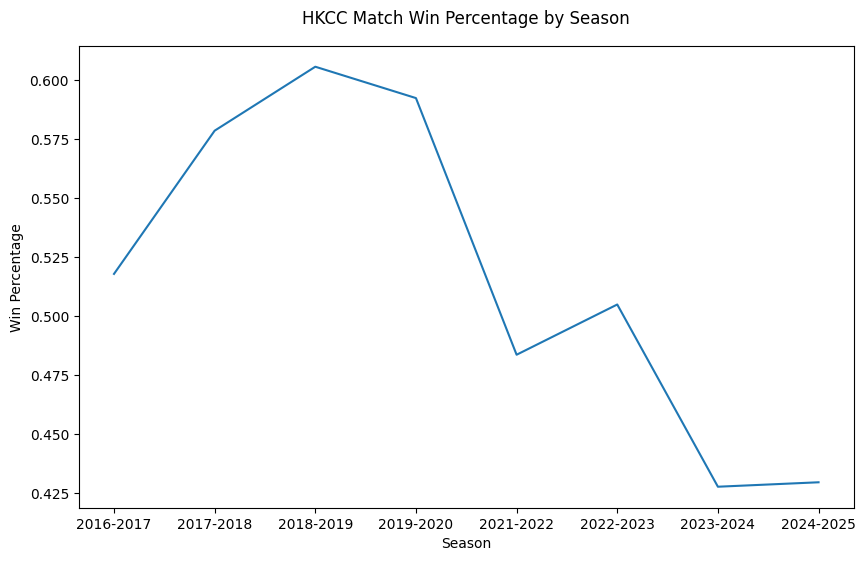

In [330]:
# Draw a line plot of the Win Percentage by Season
plt.figure(figsize=(10, 6))
# Draw a line plot of the Win Percentage by Season without confidence interval
sns.lineplot(data=hkcc_summary, x="Season", y="Win Percentage", errorbar=None)
# Set the title of the plot
plt.title("HKCC Match Win Percentage by Season", y=1.03)
# Remove gridlines
plt.grid(False)

### KCC Win Percentage by Season

In [331]:
# Filter big_summary_df for Team column that contains "KCC" or "Kowloon Cricket Club", but not "HKCC"
kcc_summary = big_summary_df[big_summary_df["Team"].str.contains(r"\b(?:Kowloon Cricket Club|KCC)\b", flags=re.IGNORECASE)]

In [332]:
# Get overall win percentage record for hkcc_summary, summing all rows in Won column and dividing by sum of all rows in Played column
win_percentage = kcc_summary["Won"].sum() / kcc_summary["Played"].sum()
win_percentage

0.6740890688259109

In [333]:
# Show Win Percentage by Season buy avoid SettingWithCopyWarning
kcc_summary = kcc_summary.copy()
kcc_summary["Win Percentage"] = kcc_summary["Won"] / kcc_summary["Played"]
kcc_summary.groupby("Season")["Win Percentage"].mean()

Season
2016-2017    0.625702
2017-2018    0.641083
2018-2019    0.704762
2019-2020    0.681812
2021-2022    0.709041
2022-2023    0.624034
2023-2024    0.683452
2024-2025    0.640079
Name: Win Percentage, dtype: float64

### HKFC Win Percentage by Season

In [334]:
# Filter big_summary_df for Team column that contains "HKFC" or "Hong Kong Football Club"
hkfc_summary = big_summary_df[big_summary_df["Team"].str.contains("HKFC", case=False) |
                              big_summary_df["Team"].str.contains("Hong Kong Football Club", case=False)]

In [335]:
# Get overall win percentage record for hkcc_summary, summing all rows in Won column and dividing by sum of all rows in Played column
hkfc_win_percentage = hkfc_summary["Won"].sum() / hkfc_summary["Played"].sum()
hkfc_win_percentage

0.5547019867549668

In [336]:
# Show Win Percentage by Season buy avoid SettingWithCopyWarning
hkfc_summary = hkfc_summary.copy()
hkfc_summary["Win Percentage"] = hkfc_summary["Won"] / hkfc_summary["Played"]
hkfc_summary.groupby("Season")["Win Percentage"].mean()

Season
2016-2017    0.554078
2017-2018    0.540525
2018-2019    0.548704
2019-2020    0.584957
2021-2022    0.509099
2022-2023    0.530581
2023-2024    0.589479
2024-2025    0.545739
Name: Win Percentage, dtype: float64

In [337]:
usrc_summary = big_summary_df[big_summary_df["Team"].str.contains("united services", case=False) |
               big_summary_df["Team"].str.contains("usrc", case=False)]

In [338]:
# Get overall win percentage record for usrc_summary, summing all rows in Won column and dividing by sum of all rows in Played column
usrc_win_percentage = usrc_summary["Won"].sum() / usrc_summary["Played"].sum()
usrc_win_percentage

0.5692090395480226

In [339]:
# Show Win Percentage by Season but avoid SettingWithCopyWarning
usrc_summary = usrc_summary.copy()
usrc_summary["Win Percentage"] = usrc_summary["Won"] / usrc_summary["Played"]
usrc_summary.groupby("Season")["Win Percentage"].mean()

Season
2016-2017    0.474890
2017-2018    0.636508
2018-2019    0.649747
2019-2020    0.714646
2021-2022    0.355219
2022-2023    0.518519
2023-2024    0.541667
2024-2025    0.651786
Name: Win Percentage, dtype: float64

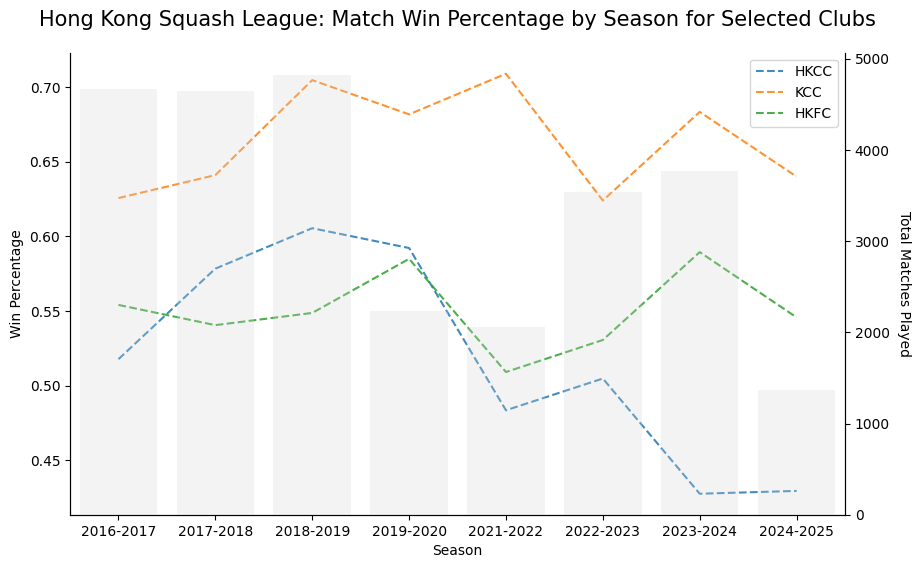

In [340]:
# Add another axis to show total number of matches played in each season
fig, ax = plt.subplots(figsize=(10, 6))
# Draw a line plot of the Win Percentage by Season for HKCC with dotted line
sns.lineplot(data=hkcc_summary, x="Season", y="Win Percentage", label="HKCC", errorbar=None, linestyle="--", alpha=0.85)
# Draw a line plot of the Win Percentage by Season for KCC
sns.lineplot(data=kcc_summary, x="Season", y="Win Percentage", label="KCC", errorbar=None, linestyle="--", alpha=0.85)
# Draw a line plot of the Win Percentage by Season for HKFC
sns.lineplot(data=hkfc_summary, x="Season", y="Win Percentage", label="HKFC", errorbar=None, linestyle="--", alpha=0.85)
# Set the title of the plot
plt.title("Hong Kong Squash League: Match Win Percentage by Season for Selected Clubs", y=1.04, size=15)
# Remove gridlines
plt.grid(False)
# Add a legend to the plot
plt.legend()
# Create another y-axis on the right side of the plot
ax2 = ax.twinx()
# Draw a bar plot of the total number of matches played in each season
sns.barplot(data=big_summary_df, x="Season", y="Played", ax=ax2, color="lightgray", alpha=0.25, errorbar=None, estimator=sum)
# Set the title of the right y-axis
ax2.set_ylabel("Total Matches Played", rotation=-90, labelpad=15)
# Remove gridlines from the right y-axis
ax2.grid(False)
# remove top spine only
sns.despine(top=True, right=False)


In [341]:
# Count the total number of matches in Played column by Season in big_summary_df
big_summary_df.groupby("Season")["Played"].sum()

Season
2016-2017    4668
2017-2018    4644
2018-2019    4826
2019-2020    2236
2021-2022    2058
2022-2023    3538
2023-2024    3772
2024-2025    1366
Name: Played, dtype: int64

In [342]:
# Find count of Teams in big_summary_df by Clubs
big_summary_df["Team"].str.extract(r"(Hong Kong Cricket Club|KCC|Hong Kong Football Club)").value_counts()

Hong Kong Football Club    261
Hong Kong Cricket Club     127
KCC                         81
Name: count, dtype: int64

In [343]:
lrc_summary = big_summary_df[big_summary_df["Team"].str.contains("LRC", case=False) |
               big_summary_df["Team"].str.contains("Ladies Recreation Club", case=False)]

In [344]:
print(len(hkfc_summary), len(kcc_summary), len(hkcc_summary), len(lrc_summary))

261 107 132 25


In [345]:
big_summary_df.sort_values(by="Team").to_csv("big_summary_df.csv", index=False)

In [346]:
len(big_summary_df[big_summary_df["Team"].str.contains("Advance", case=False)])

93

In [347]:
len(big_summary_df[big_summary_df["Team"].str.contains("friend", case=False)])

61

In [348]:
advance_summary = big_summary_df[big_summary_df["Team"].str.contains("Advance", case=False)]

# Get overall win percentage record for advance_summary, summing all rows in Won column and dividing by sum of all rows in Played column
advance_win_percentage = advance_summary["Won"].sum() / advance_summary["Played"].sum()
print(advance_win_percentage)

# Show Win Percentage by Season but avoid SettingWithCopyWarning
advance_summary = advance_summary.copy()
advance_summary["Win Percentage"] = advance_summary["Won"] / advance_summary["Played"]
print(advance_summary.groupby("Season")["Win Percentage"].mean())

0.5632262474367737
Season
2016-2017    0.634783
2017-2018    0.628957
2018-2019    0.571479
2019-2020    0.405789
2021-2022    0.673377
2022-2023    0.594004
2023-2024    0.369848
2024-2025    0.293155
Name: Win Percentage, dtype: float64


In [349]:
sha_tin_summary = big_summary_df[big_summary_df["Team"].str.contains("sha tin", case=False) |
                big_summary_df["Team"].str.contains("shatin", case=False)]

### Calculate Competitiveness of Divisions

In [350]:
def gini_coefficient(x):
    """
    Calculate the Gini coefficient of a numpy array.
    """
    # Ensure the array is 1D and sorted
    x = np.sort(np.array(x, dtype=np.float64).flatten())
    
    # Handle negative values and zeros
    if np.amin(x) < 0:
        x -= np.amin(x)
    x += 1e-9  # Prevent division by zero
    
    n = x.size
    index = np.arange(1, n + 1)
    gini = (2 * np.sum(index * x) - (n + 1) * np.sum(x)) / (n * np.sum(x))
    
    return gini

In [351]:
gini_results = []

for df in summary_df_list:
    # Extract division and season information
    division = df['Division'].iloc[0]
    season = df['Season'].iloc[0]
    
    # Extract points and handle missing or non-numeric values
    points = df['Points'].replace([np.inf, -np.inf], np.nan).dropna().astype(float).values
    
    # Skip if points array is empty
    if points.size == 0:
        continue
    
    # Calculate the Gini coefficient
    gini = gini_coefficient(points)
    
    # Store the results
    gini_results.append({'Division': division, 'Season': season, 'Gini_Coefficient': gini})


In [352]:
gini_df = pd.DataFrame(gini_results)

In [353]:
gini_df.groupby("Season")["Gini_Coefficient"].mean()

Season
2016-2017    0.240137
2017-2018    0.253069
2018-2019    0.224662
2019-2020    0.231791
2021-2022    0.232191
2022-2023    0.208233
2023-2024    0.222884
Name: Gini_Coefficient, dtype: float64

In [354]:
# Create a new column for gini_df called "League Type". If "M" is found in Division, League Type is "Masters", 
# If "L" is found in Division, League Type is "Ladies". Otherwise, league type is "Main"
gini_df["League Type"] = np.where(gini_df["Division"].str.contains("M", case=False), "Masters",
                                    np.where(gini_df["Division"].str.contains("L", case=False), "Ladies", "Main"))



In [355]:
gini_df.sort_values(by="Gini_Coefficient", ascending=False).head(25)

,Division,Season,Gini_Coefficient,League Type
8,16B,2016-2017,0.379455,Main
7,16A,2016-2017,0.374445,Main
56,L2,2017-2018,0.357810,Ladies
13,19,2016-2017,0.338599,Main
42,17B,2017-2018,0.326230,Main
105,19B,2019-2020,0.319876,Main
73,17B,2018-2019,0.317827,Main
103,18,2019-2020,0.313346,Main
124,12B,2021-2022,0.312977,Main
25,L1,2016-2017,0.312261,Ladies


In [356]:
# See average Gini Coefficient by League Type
gini_df.groupby("League Type")["Gini_Coefficient"].mean()

League Type
Ladies     0.239536
Main       0.233012
Masters    0.211647
Name: Gini_Coefficient, dtype: float64